In [85]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%run sca_selector.ipynb

# Selecting scaler
dataSet = scaler("mm", 0)
try:
    dataSet.info()
except Exception as e:
    print(f"Can't manipulate dataSet: {e}")
dataSet.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   seniorCitizen                7043 non-null   int64  
 1   partner                      7043 non-null   int64  
 2   dependents                   7043 non-null   int64  
 3   tenure                       7043 non-null   float64
 4   phoneService                 7043 non-null   int64  
 5   multipleLines                7043 non-null   int64  
 6   onlineSecurity               7043 non-null   int64  
 7   onlineBackup                 7043 non-null   int64  
 8   deviceProtection             7043 non-null   int64  
 9   techSupport                  7043 non-null   int64  
 10  streamingTV                  7043 non-null   int64  
 11  streamingMovies              7043 non-null   int64  
 12  paperlessBilling             7043 non-null   int64  
 13  monthlyCharges    

,seniorCitizen,partner,dependents,tenure,phoneService,multipleLines,onlineSecurity,onlineBackup,deviceProtection,techSupport,...,gender_Male,internetService_DSL,internetService_Fiber_optic,internetService_No,contract_Month-to-month,contract_One_year,contract_Two_year,avgMonthlyPaid,paymentMethod_auto,paymentMethod_check
0,0,1,0,0.013889,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0.245881,0,1
1,0,0,0,0.472222,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0.457772,0,1
2,0,0,0,0.027778,1,0,1,1,0,0,...,1,1,0,0,1,0,0,0.445428,0,1
3,0,0,0,0.625000,0,0,1,0,1,1,...,1,1,0,0,0,1,0,0.336949,1,0
4,0,0,0,0.027778,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0.624588,0,1


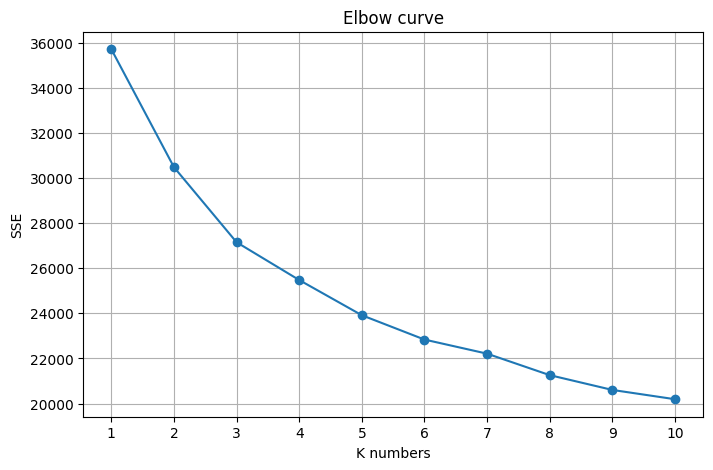

In [86]:
# Creating no churn dataset
clusterFeatures = dataSet.drop('churn', axis=1)

# Elbow curve values calcules
sse = []
kRange = range(1, 11)
for k in kRange:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clusterFeatures)
    sse.append(kmeans.inertia_)

# Elbow curve per SSE chart
plt.figure(figsize=(8,5))
plt.plot(kRange, sse, marker='o')
plt.title('Elbow curve')
plt.xlabel('K numbers')
plt.ylabel('SSE')
plt.xticks(kRange)
plt.grid(True)
plt.show()

In [87]:
# Appling KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(clusterFeatures)

# Clustered dataset created for analysis
clusteredDataSet = dataSet.copy()
clusteredDataSet['cluster'] = labels
clusteredDataSet['churn'] = dataSet['churn'].values

In [88]:
print("\nCustomers per cluster:")
print(clusteredDataSet['cluster'].value_counts())
print(f"{'-'*30}")

# Churn mean per cluster
print("\nChurn mean per cluster:")
print(clusteredDataSet.groupby('cluster')['churn'].mean())
print(f"{'-'*30}")

# Monthly charges (normalized) per cluster
print("\nMonthly charges per cluster:")
print(clusteredDataSet.groupby('cluster')['monthlyCharges'].mean())
print(f"{'-'*30}")

# Churn rate per service per cluster
services = [
    'internetService_DSL', 'internetService_Fiber_optic', 'streamingMovies', 'streamingTV', 
    'phoneService', 'techSupport', 'onlineSecurity', 'deviceProtection', 'onlineBackup'
    ]
print("\nMean churn per services per cluster:")
print(clusteredDataSet.groupby('cluster')[services].mean())



Customers per cluster:
cluster
1    3191
0    2280
2    1572
Name: count, dtype: int64
------------------------------

Churn mean per cluster:
cluster
0    0.107895
1    0.471639
2    0.075064
Name: churn, dtype: float64
------------------------------

Monthly charges per cluster:
cluster
0    0.656790
1    0.535430
2    0.034022
Name: monthlyCharges, dtype: float64
------------------------------

Mean churn per services per cluster:
         internetService_DSL  internetService_Fiber_optic  streamingMovies  \
cluster                                                                      
0                   0.520175                     0.479825         0.690789   
1                   0.373551                     0.626449         0.362269   
2                   0.027354                     0.001908         0.000636   

         streamingTV  phoneService  techSupport  onlineSecurity  \
cluster                                                           
0           0.683772      0.872807  

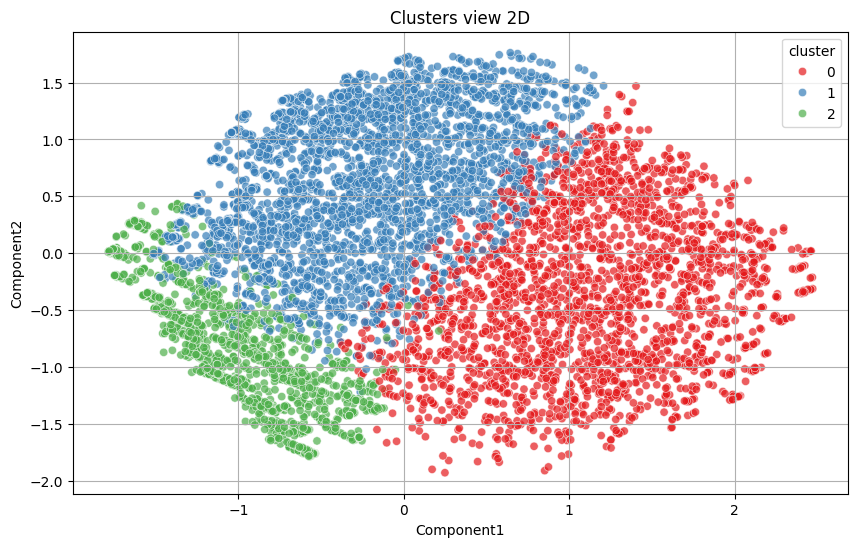

In [89]:
# PCA setting
pca = PCA(n_components=2)
pcaDatas = pca.fit_transform(clusterFeatures)
pcaViewDatas = pd.DataFrame(pcaDatas, columns=['Component1', 'Component2'])
pcaViewDatas['cluster'] = labels

# 2D chart
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pcaViewDatas, x='Component1', y='Component2', hue='cluster', palette='Set1', alpha=0.7)
plt.title('Clusters view 2D')
plt.grid(True)
plt.show()
